In [2]:
import pandas as pd
from importlib import reload
import sys
from imp import reload
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [4]:
df.Price = df.Price.apply(lambda x: str(x).replace("$",""))
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [5]:
print(df.shape)
df = df.drop_duplicates(subset=['App'], keep = 'first')
print(df.shape)

(10841, 13)
(9660, 13)


In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Rating = pd.to_numeric(df.Rating, errors='coerce')
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

<Figure size 2000x500 with 1 Axes>

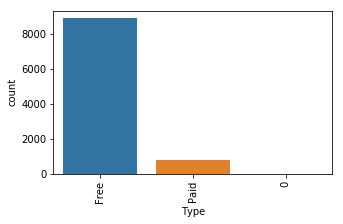

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
fig = sns.countplot(x=df['Type'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

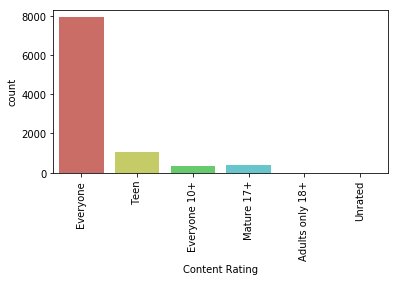

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
fig = sns.countplot(x=df['Content Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

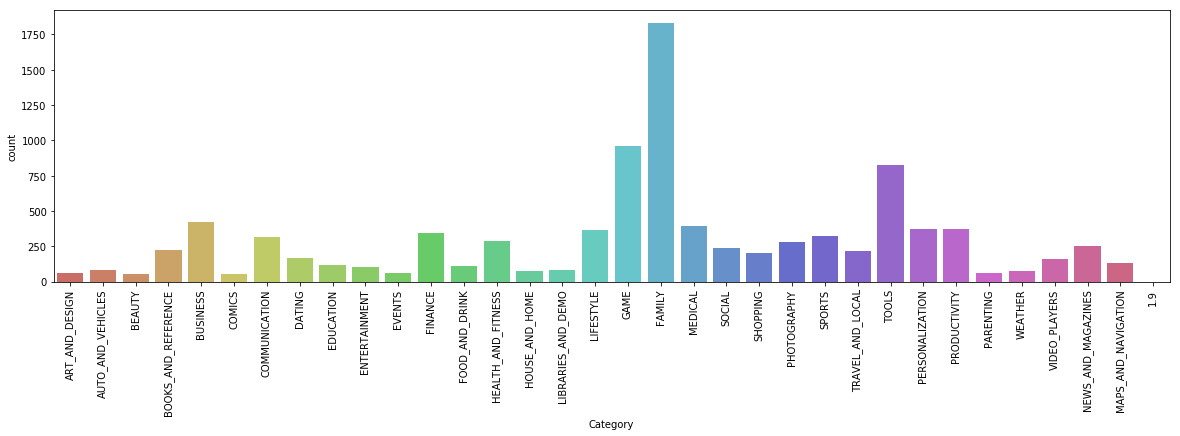

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

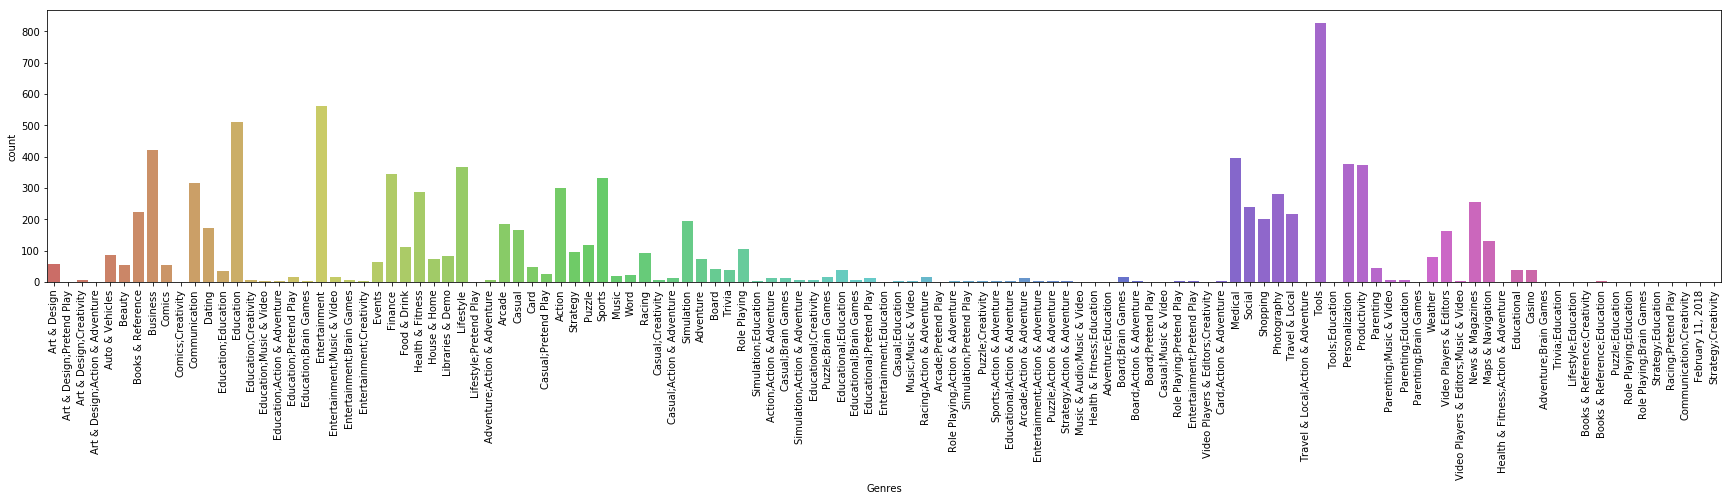

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
fig = sns.countplot(x=df['Genres'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

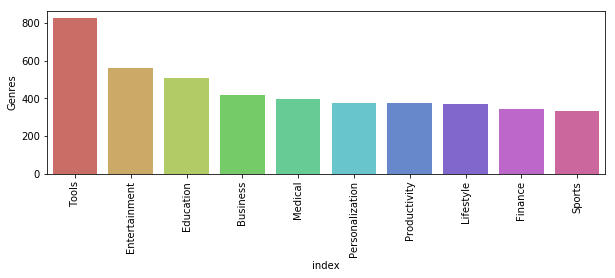

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
fig = sns.barplot(y=df['Genres'].value_counts().reset_index()[:10]['Genres'], x=df['Genres'].value_counts().reset_index()[:10]['index'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [14]:
sorted_by_rating = df.sort_values(by=['Rating'], ascending=False)
sorted_by_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
8327,The Divine Feminine App: the DF App,LIFESTYLE,5.0,8.0,6.7M,"1,000+",Free,0.0,Everyone,Lifestyle,"May 16, 2016",0.0.4,4.1 and up
9503,Pyaar Ek Dhoka,FAMILY,5.0,18.0,1.3M,50+,Free,0.0,Everyone,Casual,"February 13, 2018",1.0,4.3 and up
7164,CD CHOICE TUBE,FAMILY,5.0,10.0,5.8M,500+,Free,0.0,Everyone,Entertainment,"July 23, 2017",0.0.4,4.1 and up
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10.0,5.0M,100+,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up


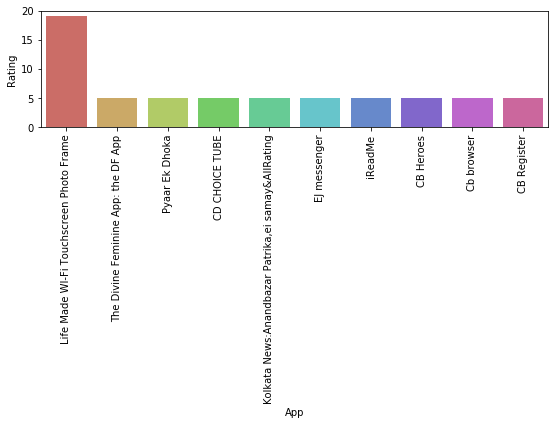

In [15]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_rating['App'][:10], y=sorted_by_rating['Rating'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

In [16]:
sorted_by_reviews = df.sort_values(by=['Reviews'], ascending=False)
sorted_by_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723.0,98M,"100,000,000+",Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


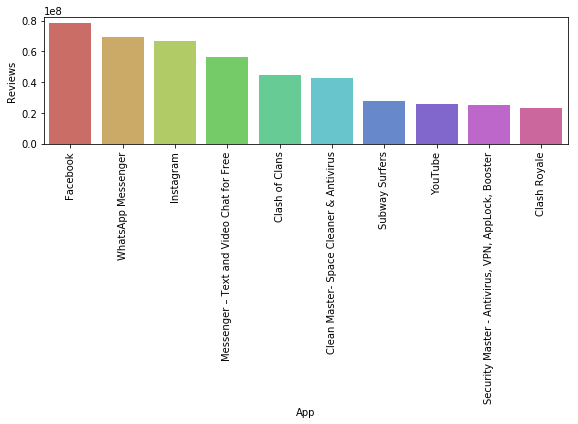

In [17]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_reviews['App'][:10], y=sorted_by_reviews['Reviews'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

In [18]:
sorted_by_price = df.sort_values(by=['Price'], ascending=False)
sorted_by_price.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0.0,40M,0+,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93.0,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41M,"1,000+",Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up


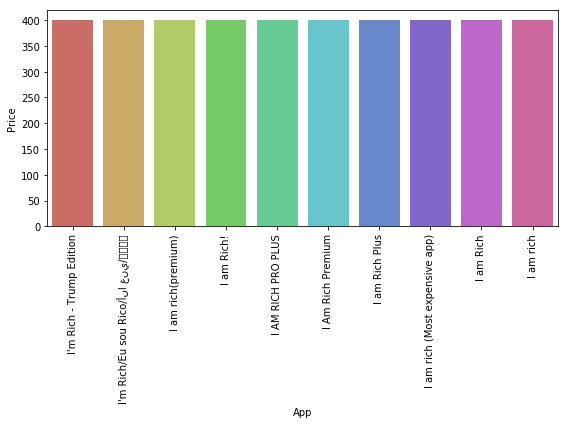

In [19]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_price['App'][:10], y=sorted_by_price['Price'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)